In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff
import os
import statistics as stat
import pandas as pd
from scipy.stats import fisher_exact
import statsmodels.formula.api as smf
import statsmodels.api as sm
plt.rcParams["axes.grid"] = False
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
mat_0R = pd.read_csv('0R_table_all.csv')
mat_0R.columns = ['Hoechst','pyrP','ssaA','pbuX']
mat_0R

,Hoechst,pyrP,ssaA,pbuX
0,131974.0,16996.0,7270.0,5912.0
1,118183.0,16080.0,5702.0,5994.0
2,118488.0,16483.0,6437.0,7702.0
3,84578.0,17727.0,6251.0,5858.0
4,91900.0,18230.0,6119.0,6315.0
...,...,...,...,...
81180,40554.0,18178.0,5115.0,6317.0
81181,34232.0,15480.0,5083.0,6050.0
81182,55885.0,17214.0,6407.0,6707.0
81183,38512.0,15842.0,5453.0,6345.0


In [3]:
mat_4R = pd.read_csv('4R_table_all.csv')
mat_4R.columns = ['Hoechst','pyrP','ssaA','pbuX']
mat_4R

,Hoechst,pyrP,ssaA,pbuX
0,227099.0,19490.0,9484.0,15985.0
1,126769.0,14055.0,6862.0,13499.0
2,107785.0,13402.0,5147.0,9489.0
3,109844.0,13708.0,6055.0,11743.0
4,160545.5,17612.0,7611.0,15809.0
...,...,...,...,...
72892,56770.0,13683.0,5291.0,11945.0
72893,35051.0,14156.0,5132.0,7465.0
72894,34669.0,13244.0,6840.0,8050.0
72895,46941.0,15212.0,6389.0,11774.0


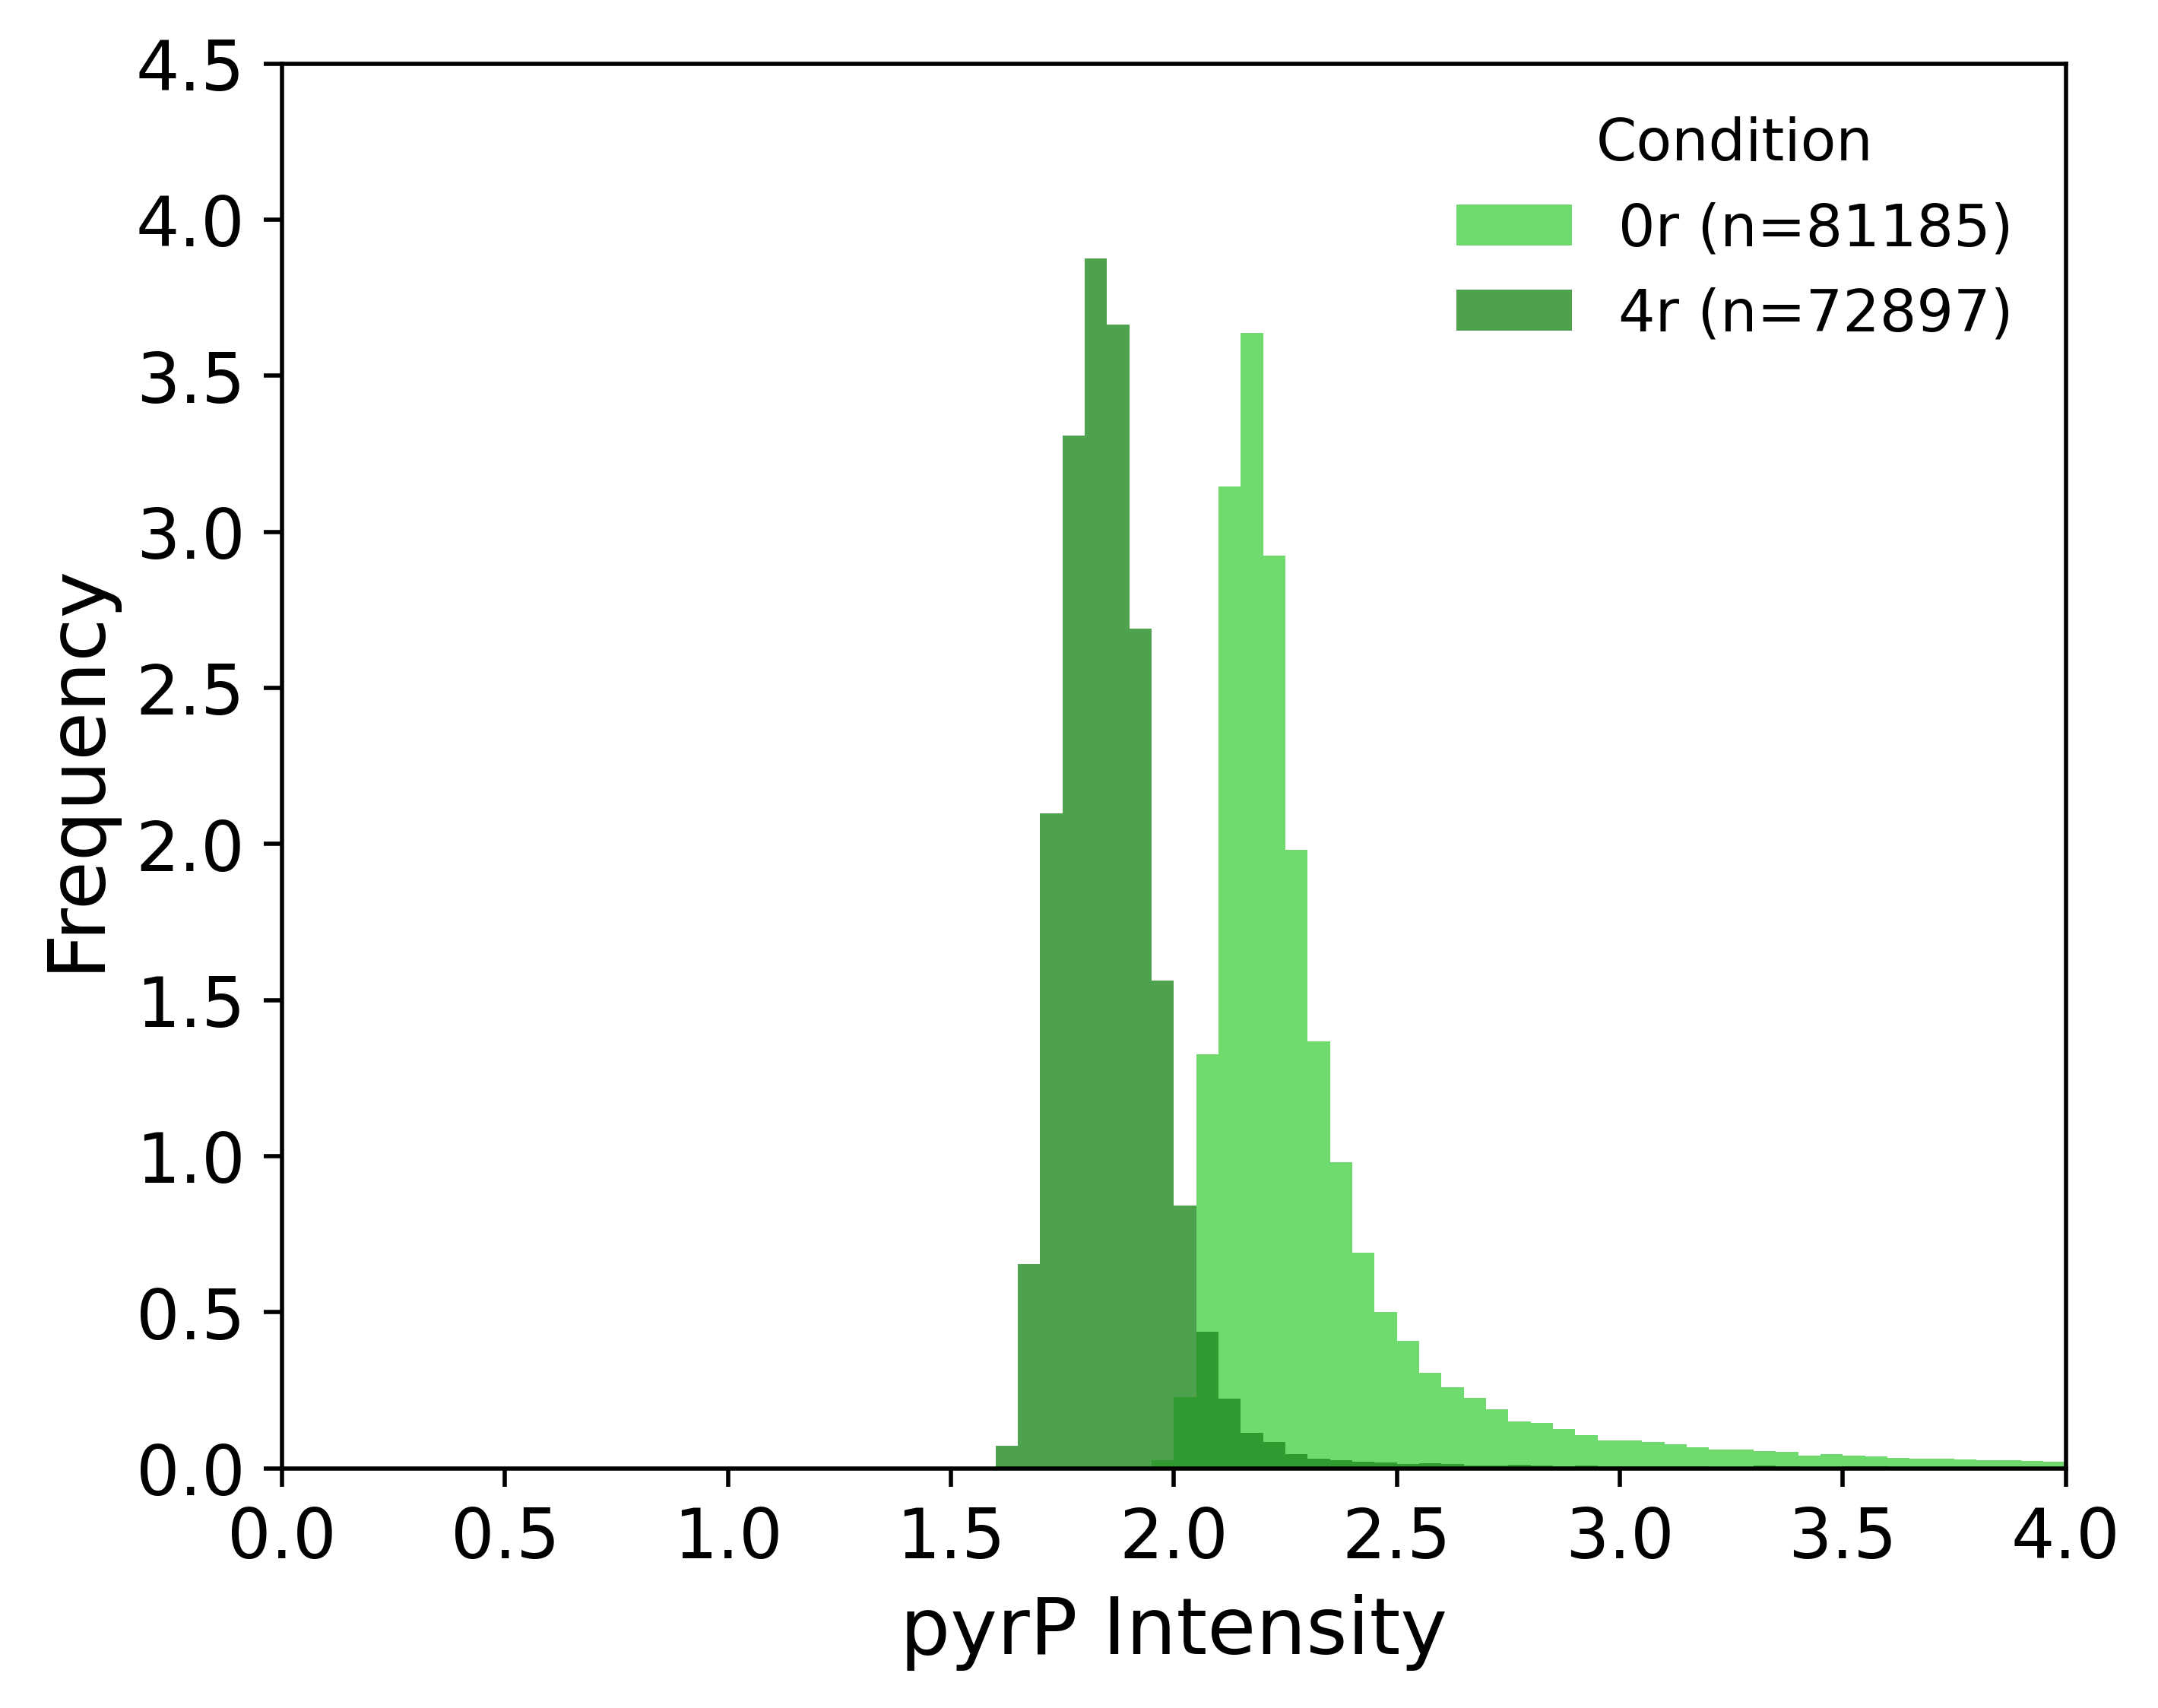

In [28]:
bins = np.arange(0,5,.05)
asp = .7
norm_1 = np.mean((stat.mode(mat_0R['pyrP']), stat.mode(mat_4R['pyrP']))) / 2

plt.figure(dpi=500) 
plt.hist(mat_0R['pyrP']/norm_1, bins = bins, alpha = .7, density = True, 
         color = "limegreen", label=f"0r (n={mat_0R.shape[0]})")
plt.hist(mat_4R['pyrP']/norm_1, bins = bins, alpha = .8, density = True, 
         color = "forestgreen", label=f"4r (n={mat_4R.shape[0]})")
ax = plt.gca()
ax.set_aspect(asp, adjustable='box')
ax.set_xlim(0, 4)
ax.set_ylim(0, 4.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency",fontsize = 15)
plt.xlabel("pyrP Intensity",fontsize = 15)
plt.legend(title="Condition", loc="upper right", frameon=False, fontsize=11, title_fontsize=11)
plt.savefig( "pyrP_intensity_histogram.pdf", bbox_inches='tight')
plt.show()

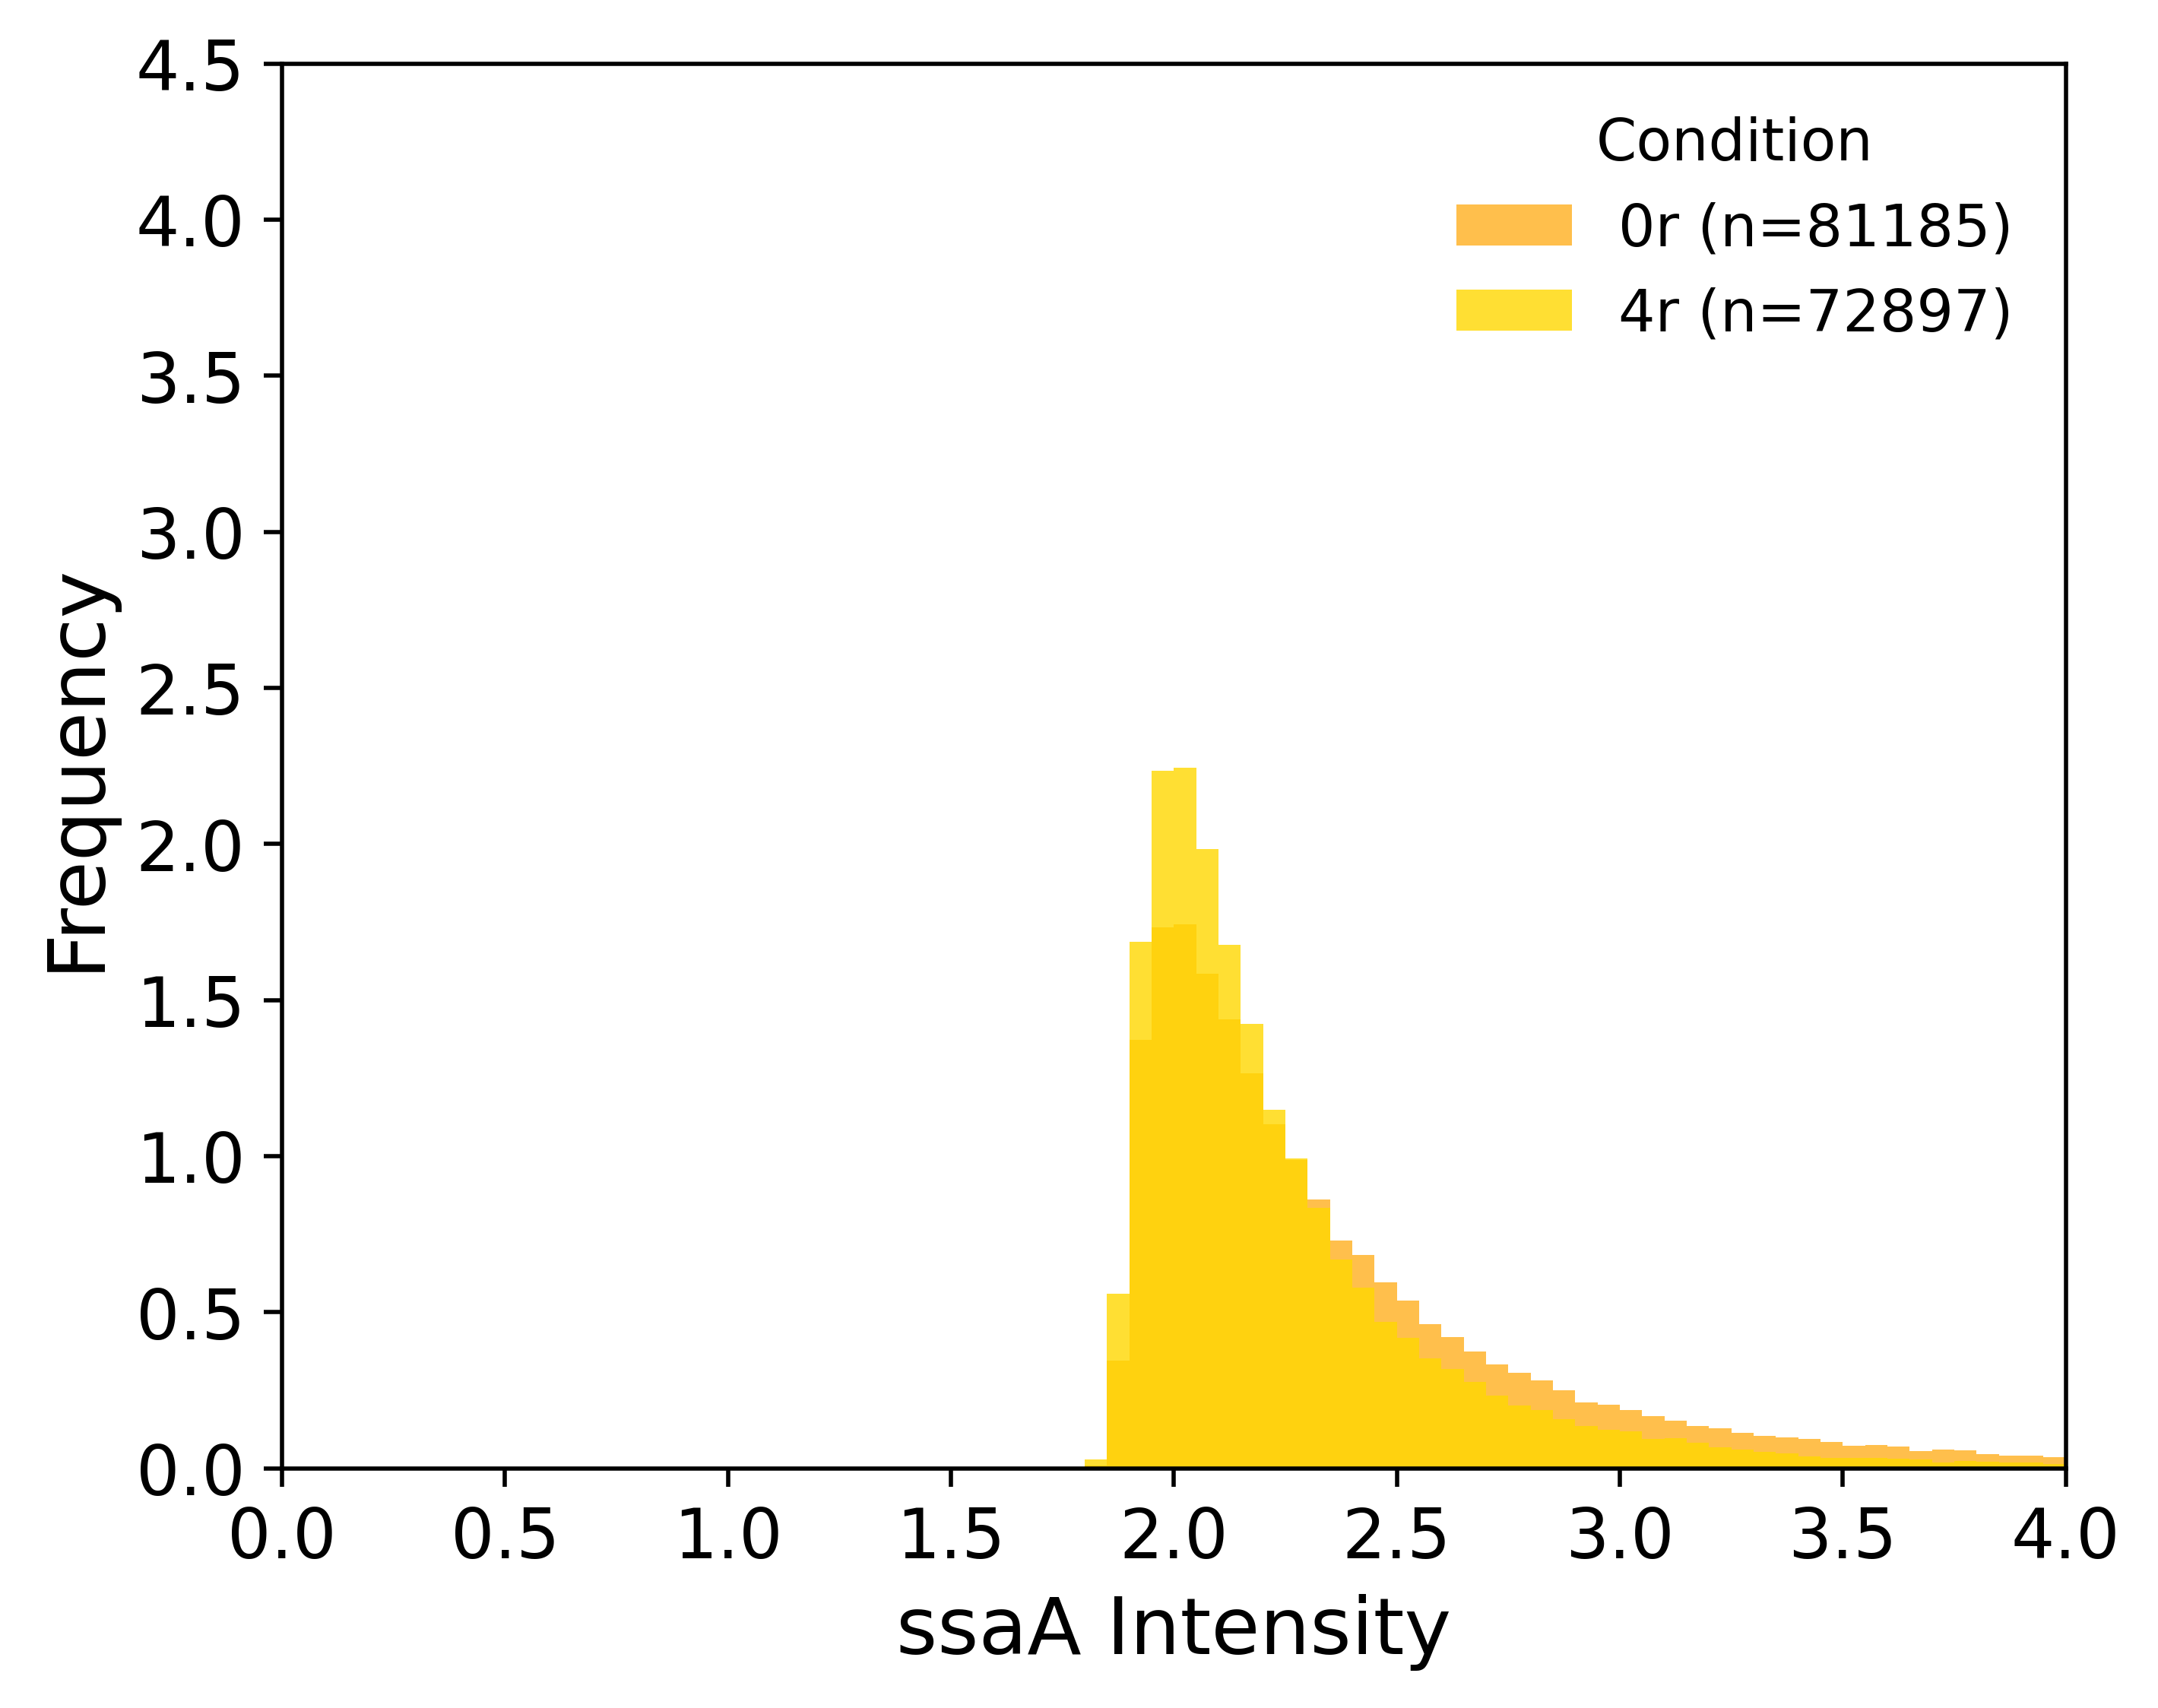

In [27]:
bins = np.arange(0,5,.05)
asp = .7
norm_2 = np.mean((stat.mode(mat_0R['ssaA']), stat.mode(mat_4R['ssaA']))) / 2

plt.figure(dpi=500) 
plt.hist(mat_0R['ssaA']/norm_2, bins = bins, alpha = .7, density = True, 
         color = "orange", label=f"0r (n={mat_0R.shape[0]})")
plt.hist(mat_4R['ssaA']/norm_2, bins = bins, alpha = .8, density = True, 
         color = "gold", label=f"4r (n={mat_4R.shape[0]})")
ax = plt.gca()
ax.set_aspect(asp, adjustable='box')
ax.set_xlim(0, 4)
ax.set_ylim(0, 4.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency",fontsize = 15)
plt.xlabel("ssaA Intensity",fontsize = 15)
plt.legend(title="Condition", loc="upper right", frameon=False, fontsize=11, title_fontsize=11)
plt.savefig( "ssaA_intensity_histogram.pdf", bbox_inches='tight')
plt.show()

In [20]:
u_stat, p = stats.mannwhitneyu(mat_0R['ssaA']/norm_2, mat_4R['ssaA']/norm_2, alternative="greater")
u_stat,p

(3418741318.5, 0.0)

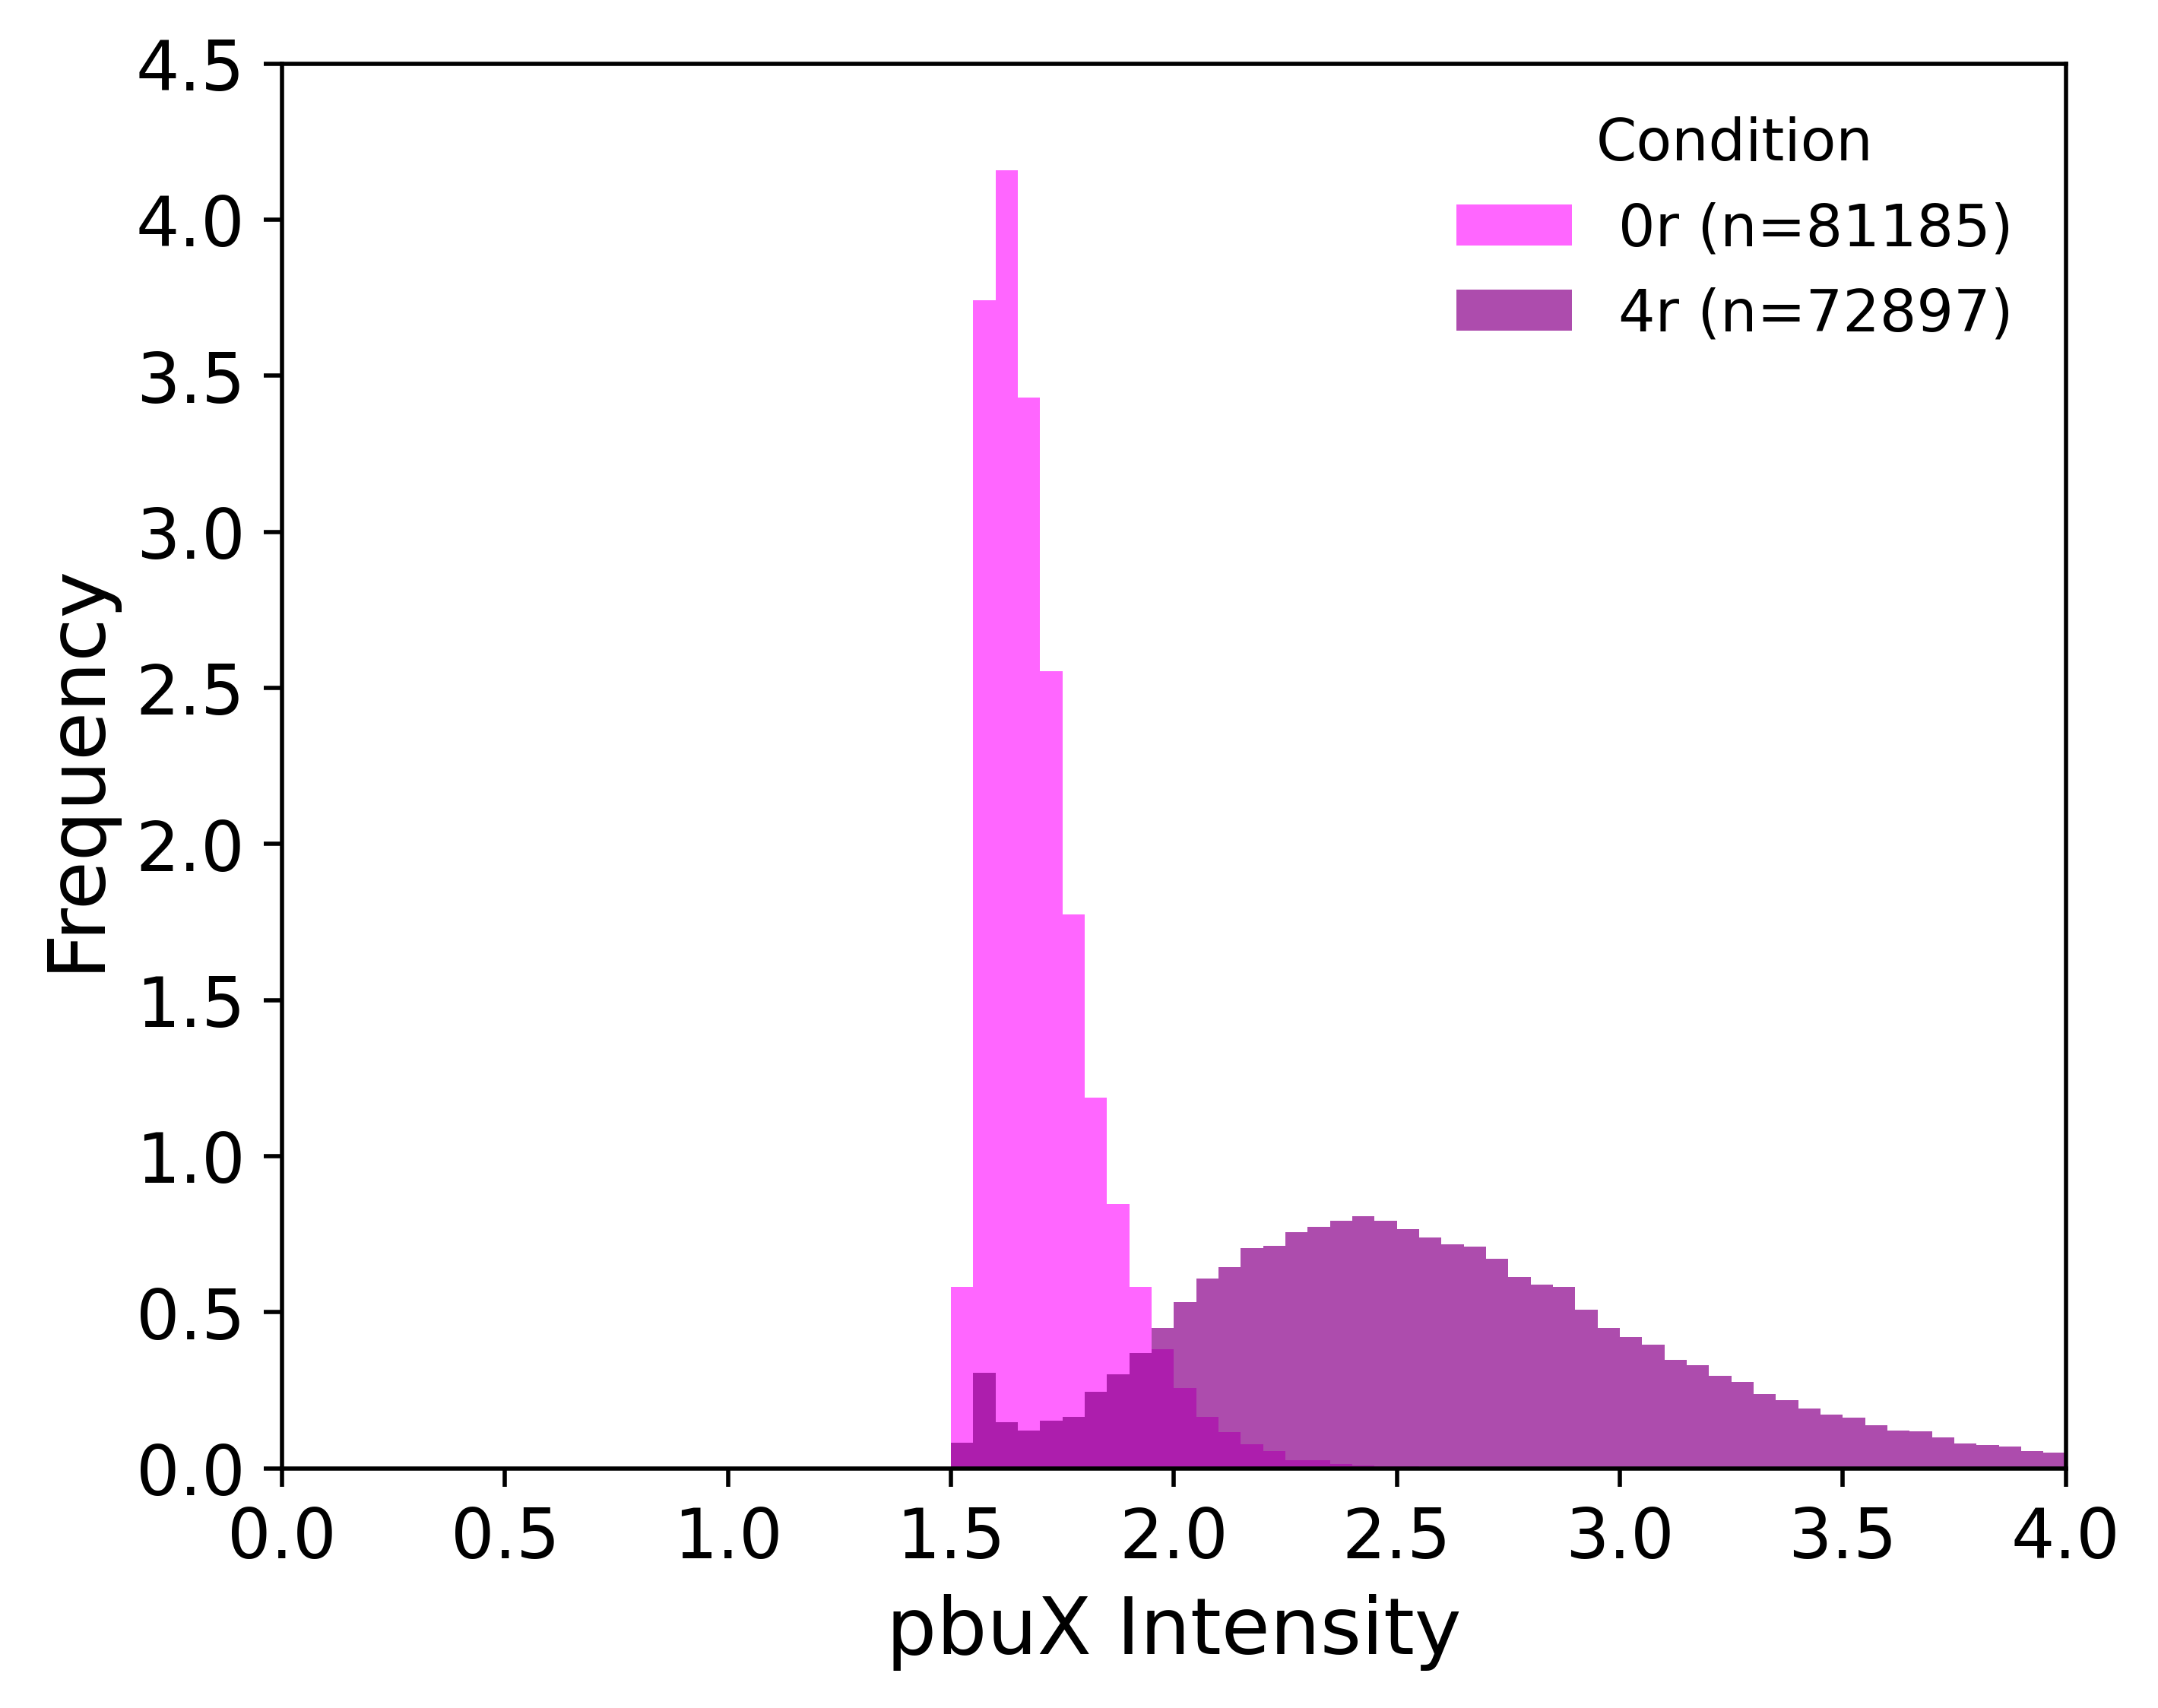

In [26]:
bins = np.arange(0,5,.05)

norm_3 = np.mean((stat.mode(mat_0R['pbuX']), stat.mode(mat_4R['pbuX']))) / 2

plt.figure(dpi=500) 
plt.hist(mat_0R['pbuX']/norm_3, bins = bins, alpha = .6, density = True,
         color = "magenta", label=f"0r (n={mat_0R.shape[0]})")
plt.hist(mat_4R['pbuX']/norm_3, bins = bins, alpha = .7, density = True, 
         color = "darkmagenta",label=f"4r (n={mat_4R.shape[0]})")
ax = plt.gca()
ax.set_aspect(asp, adjustable='box')
ax.set_xlim(0, 4)
ax.set_ylim(0, 4.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency",fontsize = 15)
plt.xlabel("pbuX Intensity",fontsize = 15)
plt.legend(title="Condition", loc="upper right", frameon=False, fontsize=11, title_fontsize=11)
plt.savefig( "pbuX_intensity_histogram.pdf", bbox_inches='tight')
plt.show()

In [17]:
norm_1

14465.0

In [29]:
mat_4R

,Hoechst,pyrP,ssaA,pbuX,sample
0,227099.0,19490.0,9484.0,15985.0,4r
1,126769.0,14055.0,6862.0,13499.0,4r
2,107785.0,13402.0,5147.0,9489.0,4r
3,109844.0,13708.0,6055.0,11743.0,4r
4,160545.5,17612.0,7611.0,15809.0,4r
...,...,...,...,...,...
72892,56770.0,13683.0,5291.0,11945.0,4r
72893,35051.0,14156.0,5132.0,7465.0,4r
72894,34669.0,13244.0,6840.0,8050.0,4r
72895,46941.0,15212.0,6389.0,11774.0,4r


In [30]:
mat_0R['sample']='0r'
mat_4R['sample']='4r'

In [31]:
df=pd.concat([mat_0R,mat_4R],ignore_index=True)
df

,Hoechst,pyrP,ssaA,pbuX,sample
0,131974.0,16996.0,7270.0,5912.0,0r
1,118183.0,16080.0,5702.0,5994.0,0r
2,118488.0,16483.0,6437.0,7702.0,0r
3,84578.0,17727.0,6251.0,5858.0,0r
4,91900.0,18230.0,6119.0,6315.0,0r
...,...,...,...,...,...
154077,56770.0,13683.0,5291.0,11945.0,4r
154078,35051.0,14156.0,5132.0,7465.0,4r
154079,34669.0,13244.0,6840.0,8050.0,4r
154080,46941.0,15212.0,6389.0,11774.0,4r


In [32]:
df['pyrP']=df['pyrP']/norm_1
df['ssaA']=df['ssaA']/norm_2
df['pbuX']=df['pbuX']/norm_3
df

,Hoechst,pyrP,ssaA,pbuX,sample
0,131974.0,2.339677,2.724888,1.578427,0r
1,118183.0,2.213580,2.137181,1.600320,0r
2,118488.0,2.269057,2.412669,2.056334,0r
3,84578.0,2.440307,2.342954,1.564010,0r
4,91900.0,2.509550,2.293478,1.686023,0r
...,...,...,...,...,...
154077,56770.0,1.883608,1.983133,3.189160,4r
154078,35051.0,1.948721,1.923538,1.993058,4r
154079,34669.0,1.823175,2.563718,2.149246,4r
154080,46941.0,2.094091,2.394678,3.143506,4r


In [25]:
norm_3

3745.5

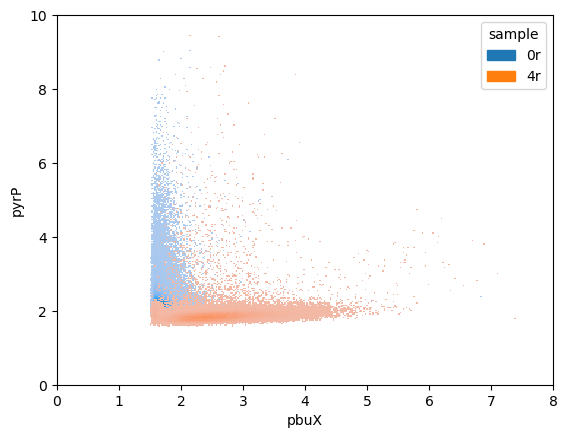

In [43]:

sns.histplot(data=df, x='pbuX', y='pyrP',  bins=500,
             hue='sample'
                )
plt.xlim(0,8)
plt.ylim(0,10)
plt.savefig("pyrP_pbuX_sample_histplot.pdf")

In [54]:
xy = df[["pbuX","pyrP"]].dropna()
r, p = pearsonr(xy["pbuX"], xy["pyrP"])
r,p

(-0.3530200724376234, 0.0)

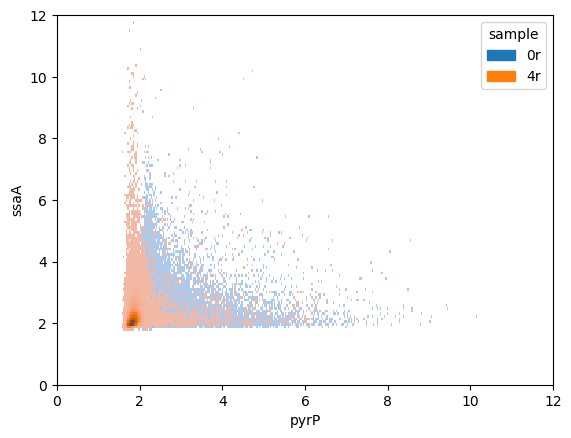

In [ ]:
sns.histplot(data=df, x='pyrP', y='ssaA',bins=500,
             hue='sample'
                )
plt.xlim(0,12)
plt.ylim(0,12)
plt.savefig("pyrP_ssaA_sample_histplot.pdf")

In [53]:
xy = df[["ssaA","pyrP"]].dropna()
r, p = pearsonr(xy["ssaA"], xy["pyrP"])
r,p

(0.08219336767163661, 3.905302846942818e-229)

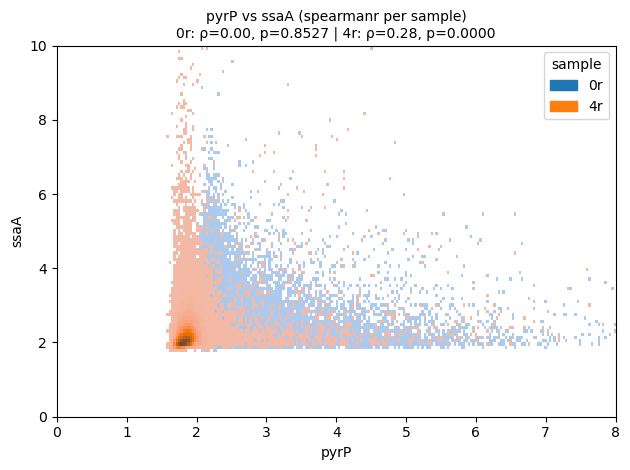

In [37]:
ax = sns.histplot(
    data=df, x="pyrP", y="ssaA",
    bins=500, hue="sample"
)

# compute per-sample Spearman r and p
lines = []
for s, g in df[["pyrP","ssaA","sample"]].dropna().groupby("sample"):
    r, p = spearmanr(g["pyrP"].to_numpy(), g["ssaA"].to_numpy())
    lines.append(f"{s}: ρ={r:.2f}, p={p:.4f}")

ax.set_title("pyrP vs ssaA (spearmanr per sample)\n" + " | ".join(lines), fontsize=10)

ax.set_xlim(0, 8)
ax.set_ylim(0, 10)
plt.tight_layout()

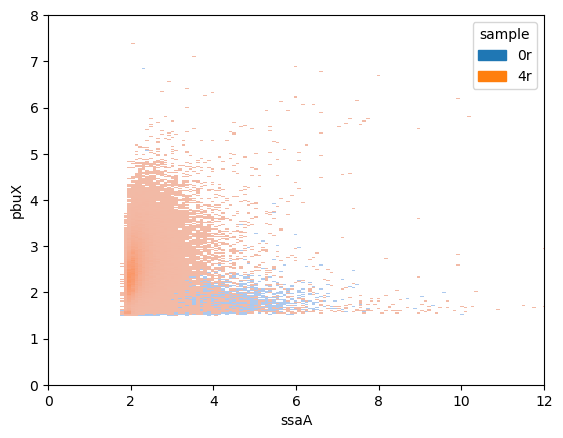

In [93]:
sns.histplot(data=df, x='ssaA', y='pbuX',bins=500,
             hue='sample'
                )
plt.xlim(0,12)
plt.ylim(0,8)
plt.savefig("ssaA_pbuX_sample_histplot.pdf")

In [51]:
xy = df[["ssaA","pbuX"]].dropna()
r, p = pearsonr(xy["ssaA"], xy["pbuX"])
r,p

(0.0011431821608228095, 0.6536242747223848)

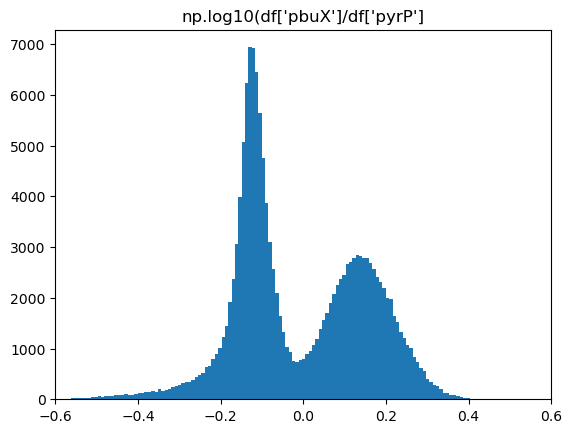

In [97]:
np.log10(df['pbuX']/df['pyrP']).hist(bins=200)
plt.xlim(-0.6,0.6)
plt.grid(False)
plt.title("np.log10(df['pbuX']/df['pyrP']")
plt.savefig("hist_pbuX_pyrP.pdf")

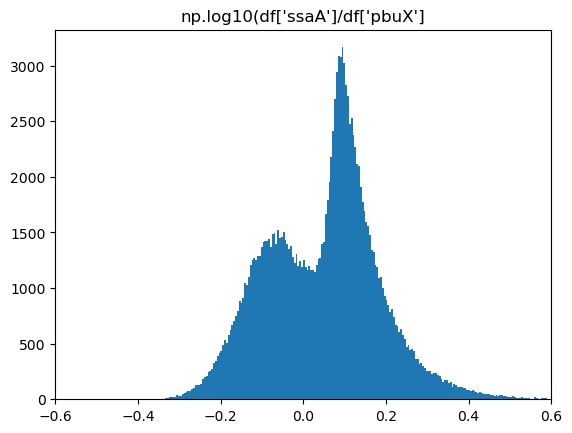

In [99]:
np.log10(df['ssaA']/df['pbuX']).hist(bins=500)
plt.xlim(-0.6,0.6)
plt.grid(False)
plt.title("np.log10(df['ssaA']/df['pbuX']")
plt.savefig("hist_ssaA_pbuX.pdf")

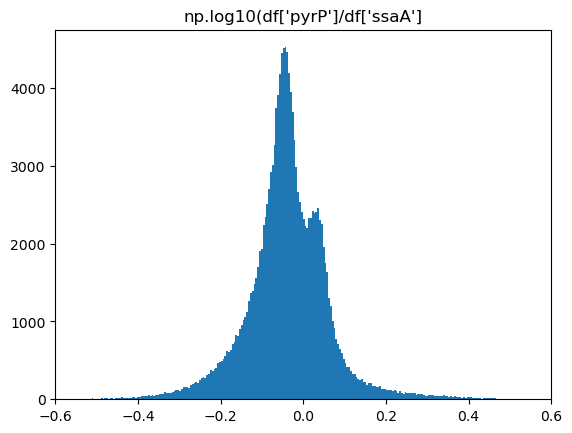

In [108]:
np.log10(df['pyrP']/df['ssaA']).hist(bins=500)
plt.xlim(-0.6,0.6)
plt.grid(False)
plt.title("np.log10(df['pyrP']/df['ssaA']")
plt.savefig("hist_pyrP_ssaA.pdf")

In [103]:
df.to_csv('FISH_all_norm.csv', index=False)